In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin
from tqdm import tqdm_notebook
import pandas as pd
import base64
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
url_base = 'https://tv.naver.com/'
url_sub = 'r'
url = url_base + url_sub

In [3]:
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [4]:
date = soup.select_one('.noti').get_text()
date

'11.18 Ïò§ÌõÑ 4Ïãú ~ Ïò§ÌõÑ 5Ïãú Í∏∞Ï§Ä (Ïû¨ÏÉùÏàò, Ïû¨ÏÉùÏãúÍ∞Ñ)'

In [5]:
week_date = ' '.join(date.split()[0:6])
week_date
# Í∏∞Ï§Ä ÎÇ†Ïßú

'11.18 Ïò§ÌõÑ 4Ïãú ~ Ïò§ÌõÑ 5Ïãú'

In [6]:
top_song_lists = soup.select_one('.rolling')
# top3 ÏùåÏïÖÏùÄ Î≥ÑÎèÑÎ°ú Íµ¨Î∂Ñ

In [7]:
top_song_list = top_song_lists.select('.info')

In [8]:
song_lists = soup.select_one('.cds_area')

In [9]:
song_list = song_lists.select('.cds')

In [10]:
top_title = top_song_list[0].select_one('.tit').get_text()
top_title
# Ï†úÎ™©

'[ÏïµÏª§Î¶¨Ìè¨Ìä∏] "Ïú†Î™®Ï∞® ÎÅà ÏóÑÎßà, ÏñëÎ≥¥ ÏóÜÎäî Ïö¥Ï†ÑÏûê"...Í¥ëÏ£º Ïä§Ïø®Ï°¥Ïùò ÎπÑÍ∑π'

In [11]:
top_channel = top_song_list[0].select_one('.chn').get_text().strip()
top_channel
# Ï±ÑÎÑê

'Îâ¥Ïä§Îäî YTN'

In [12]:
top_hit = top_song_list[0].select_one('.hit').get_text().replace('Ïû¨ÏÉù Ïàò','').replace(',','')
top_hit
# Ï°∞ÌöåÏàò

'90517'

In [13]:
top_like = top_song_list[0].select_one('.like').get_text().replace('Ï¢ãÏïÑÏöî Ïàò','').replace(',','')
top_like
# Ï¢ãÏïÑÏöî Ïàò

'25'

In [14]:
top_rank = top_song_list[0].select_one('.num').get_text()
top_rank
# Îû≠ÌÅ¨

'1'

In [15]:
title = song_list[0].select_one('.title').get_text().strip()
title
# Ï†úÎ™©

'Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´'

In [16]:
channel = song_list[0].select_one('.chn').get_text().strip()
channel
# Ï±ÑÎÑê

'ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ'

In [17]:
hit = song_list[0].select_one('.hit').get_text().replace('Ïû¨ÏÉù Ïàò','').replace(',','')
hit
# Ïû¨ÏÉù Ïàò

'357253'

In [18]:
like = song_list[0].select_one('.like').get_text().replace('Ï¢ãÏïÑÏöî Ïàò','').replace(',','')
like
# Ï¢ãÏïÑÏöî Ïàò

'26704'

In [19]:
rank = song_list[0].select_one('.num').get_text()
rank
# Îû≠ÌÅ¨

'4'

In [20]:
top_song_list[0].select_one('.num').get_text()

'1'

In [21]:
top_rank_list = []; top_channel_list = []; top_hit_list = []; top_like_list = []; top_title_list = []
for list in top_song_list:

    t_rank = int(list.select_one('.num').get_text())
    t_channel = list.select_one('.chn').get_text().strip()
    t_hit = int(list.select_one('.hit').get_text().replace('Ïû¨ÏÉù Ïàò','').replace(',',''))
    t_like = int(list.select_one('.like').get_text().replace('Ï¢ãÏïÑÏöî Ïàò','').replace(',',''))
    t_title = list.select_one('.title').get_text().strip()

    top_rank_list.append(t_rank)
    top_channel_list.append(t_channel)
    top_hit_list.append(t_hit)
    top_like_list.append(t_like)
    top_title_list.append(t_title)

In [22]:
df = pd.DataFrame({
    'Rank': top_rank_list,
    'Title': top_title_list,
    'Hit': top_hit_list,
    'Like': top_like_list,
    'Channel': top_channel_list
})
df.head()

Rank                                              Title     Hit   Like  \
0     1         [ÏïµÏª§Î¶¨Ìè¨Ìä∏] "Ïú†Î™®Ï∞® ÎÅà ÏóÑÎßà, ÏñëÎ≥¥ ÏóÜÎäî Ïö¥Ï†ÑÏûê"...Í¥ëÏ£º Ïä§Ïø®Ï°¥Ïùò ÎπÑÍ∑π   90517     25   
1     2          Ïû†ÏãúÎßå ÏïàÎÖï. ÍπÄÌò∏Ï§ë Íµ∞Î≥µÎ¨¥Ï†Ñ ÎßàÏßÄÎßâ Î¨¥ÎåÄ ÔºúÎ∞∞ÏõÖÔºû„Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5  429735  21520   
2     3  [ÏÑ†Í≥µÍ∞ú] Ïù¥Í≤ÉÏù¥ Î™®Î≤îÏÉùÏùò Í¥ëÍ∏∞Îã§...! Ïñ¥Ï©åÎã§ 'BTS Ïó¨Í≥†ÏÉù' (feat. Ï°∞Ìöå...   29311    234   

            Channel  
0           Îâ¥Ïä§Îäî YTN  
1  ÏïÑÎ¨¥ÎèÑ Î™®Î•¥Í≤å ÍπÄÌò∏Ï§ëÏùò ÌååÌä∏ÎÑà  
2       Ïú† ÌÄ¥Ï¶à Ïò® Îçî Î∏îÎü≠

In [32]:
rank_list = []; channel_list = []; hit_list = []; like_list = []; title_list = []
for list in song_list:

    rank = int(list.select_one('.num').get_text())
    channel = list.select_one('.chn').get_text().strip()
    hit = int(list.select_one('.hit').get_text().replace('Ïû¨ÏÉù Ïàò','').replace(',',''))
    like = int(list.select_one('.like').get_text().replace('Ï¢ãÏïÑÏöî Ïàò','').replace(',',''))
    title = list.select_one('.title').get_text().strip()

    rank_list.append(rank)
    channel_list.append(channel)
    hit_list.append(hit)
    like_list.append(like)
    title_list.append(title)

In [33]:
df2 = pd.DataFrame({
    'Rank': rank_list,
    'Title': title_list,
    'Hit': hit_list,
    'Like': like_list,
    'Channel': channel_list
})
df2.head()

Rank                                         Title     Hit   Like  \
0     4                        Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´  357253  26704   
1     5       [Full] Í∞úÌïô Ï≤´ ÎÇ†Î∂ÄÌÑ∞ ÏÑ† ÎÑòÎÑ§? [ÎùºÏù¥Î∏åÏò®] - EP.01~02  124550   2402   
2     6              ÏÑ∏ ÏïÑÏù¥ÏôÄ ÏóÑÎßà ÎçÆÏπú 8.5t Ìä∏Îü≠‚Ä¶'Ïã†Ìò∏Îì±ÏùÄ Ïôú ÏóÜÏóàÎÇò'   14245     10   
3     7                                   'ÏÜåÏö∏' Î©îÏù∏ ÏòàÍ≥†Ìé∏   55599    676   
4     8  [ÏÑ†Í≥µÍ∞ú] Ìó®Î¶¨Í∞Ä ÏûêÏ°¥Í∞êÏùÑ ÏÉÅÏäπÏãúÌÇ§Îäî ÍøÄÌåÅÏùÄ?! (feat. ÏãúÏÑ† ÎßåÎÅΩ) üöòüöòüöò   12268    469   

                          Channel  
0                         ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ  
1  ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Ïò§Î¶¨ÏßÄÎÑê PLAYLIST ORIGINALS  
2                          JTBCÎâ¥Ïä§  
3                  ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî ÏòàÍ≥†Ìé∏ Ï†ÄÏû•ÏÜå  
4                           ÎùºÎîîÏò§Ïä§ÌÉÄ

In [35]:
df.to_csv('top_song_list.csv')

In [36]:
df.to_csv('song_list.csv')

In [43]:
df

Rank                                              Title     Hit   Like  \
0     1         [ÏïµÏª§Î¶¨Ìè¨Ìä∏] "Ïú†Î™®Ï∞® ÎÅà ÏóÑÎßà, ÏñëÎ≥¥ ÏóÜÎäî Ïö¥Ï†ÑÏûê"...Í¥ëÏ£º Ïä§Ïø®Ï°¥Ïùò ÎπÑÍ∑π   90517     25   
1     2          Ïû†ÏãúÎßå ÏïàÎÖï. ÍπÄÌò∏Ï§ë Íµ∞Î≥µÎ¨¥Ï†Ñ ÎßàÏßÄÎßâ Î¨¥ÎåÄ ÔºúÎ∞∞ÏõÖÔºû„Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5  429735  21520   
2     3  [ÏÑ†Í≥µÍ∞ú] Ïù¥Í≤ÉÏù¥ Î™®Î≤îÏÉùÏùò Í¥ëÍ∏∞Îã§...! Ïñ¥Ï©åÎã§ 'BTS Ïó¨Í≥†ÏÉù' (feat. Ï°∞Ìöå...   29311    234   

            Channel  
0           Îâ¥Ïä§Îäî YTN  
1  ÏïÑÎ¨¥ÎèÑ Î™®Î•¥Í≤å ÍπÄÌò∏Ï§ëÏùò ÌååÌä∏ÎÑà  
2       Ïú† ÌÄ¥Ï¶à Ïò® Îçî Î∏îÎü≠

In [44]:
df2

Rank                                              Title     Hit   Like  \
0      4                             Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´  357253  26704   
1      5            [Full] Í∞úÌïô Ï≤´ ÎÇ†Î∂ÄÌÑ∞ ÏÑ† ÎÑòÎÑ§? [ÎùºÏù¥Î∏åÏò®] - EP.01~02  124550   2402   
2      6                   ÏÑ∏ ÏïÑÏù¥ÏôÄ ÏóÑÎßà ÎçÆÏπú 8.5t Ìä∏Îü≠‚Ä¶'Ïã†Ìò∏Îì±ÏùÄ Ïôú ÏóÜÏóàÎÇò'   14245     10   
3      7                                        'ÏÜåÏö∏' Î©îÏù∏ ÏòàÍ≥†Ìé∏   55599    676   
4      8       [ÏÑ†Í≥µÍ∞ú] Ìó®Î¶¨Í∞Ä ÏûêÏ°¥Í∞êÏùÑ ÏÉÅÏäπÏãúÌÇ§Îäî ÍøÄÌåÅÏùÄ?! (feat. ÏãúÏÑ† ÎßåÎÅΩ) üöòüöòüöò   12268    469   
..   ...                                                ...     ...    ...   
92    96                    ÔºúÏÑ†Í≥µÍ∞úÔºû EXID! Í∞úÏù∏ ÌôúÎèô ÌõÑ, Ïã¨Í≤Ω ÏµúÏ¥à Í≥†Î∞±?!  211203    555   
93    97                 2018-19 'ÏïÑÏãúÏïÑ ÏµúÏ¥à Ïã†Ïù∏ÏÉÅ' Îã§Ïãú Î≥¥Îäî ÏûÑÏÑ±Ïû¨ ÌôúÏïΩÏÉÅ    7111      8   
94    98  ÍπÄÎ≤îxÍπÄÏö©ÏßÄ Ïó¨Ïö∞ ÏΩ§ÎπÑÏùò Í∑ÄÏóºÎΩÄÏßù Ïù∏ÌÑ∞Î∑∞! [Íµ¨ÎØ∏Ìò∏Îéê  Î™ªÎã§ Ìïú Ïù¥ÏïºÍ∏∞] ÏÜåÍ∞úÌï¥ÎìúÎ¶ΩÎãàÎã§‚ô•   12262    334   
95    99    [Ï∞®ÌôçÏä§ÌÉÄÏùºÎßÅ] ÎèôÍ∑∏ÎûÄÏñºÍµ¥Ìòï, ÏÇ¨Ïù¥ÎìúÎ±ÖÏúºÎ°ú Î®∏Î¶¨ ÏòàÏÅòÍ≤å Í∏∏Îü¨ Î≥¥ÏïÑÏöîüíáüíá‚Äç‚ôÄÔ∏èRound    4809     54   
96   100                10Î™Ö Ïù¥ÏÉÅ Ïã†Í∑ú ÏßëÎã®Í∞êÏóº ÌïòÎ£® 10Í±¥...81ÏùºÎßåÏóê 3Î∞± Î™ÖÎåÄ     817      0   

                           Channel  
0                          ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ  
1   ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Ïò§Î¶¨ÏßÄÎÑê PLAYLIST ORIGINALS  
2                           JTBCÎâ¥Ïä§  
3                   ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî ÏòàÍ≥†Ìé∏ Ï†ÄÏû•ÏÜå  
4                            ÎùºÎîîÏò§Ïä§ÌÉÄ  
..                             ...  
92                             ÎØ∏Ïì∞Î∞±  
93               GOLFTV X PGA TOUR  
94                            Íµ¨ÎØ∏Ìò∏Îéê  
95             Ï∞®Ìôç chahong official  
96                         Îâ¥Ïä§Îäî YTN  

[97 rows x 5 columns]

In [67]:
x = pd.concat([df, df2])
x

Rank                                              Title     Hit   Like  \
0      1         [ÏïµÏª§Î¶¨Ìè¨Ìä∏] "Ïú†Î™®Ï∞® ÎÅà ÏóÑÎßà, ÏñëÎ≥¥ ÏóÜÎäî Ïö¥Ï†ÑÏûê"...Í¥ëÏ£º Ïä§Ïø®Ï°¥Ïùò ÎπÑÍ∑π   90517     25   
1      2          Ïû†ÏãúÎßå ÏïàÎÖï. ÍπÄÌò∏Ï§ë Íµ∞Î≥µÎ¨¥Ï†Ñ ÎßàÏßÄÎßâ Î¨¥ÎåÄ ÔºúÎ∞∞ÏõÖÔºû„Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5  429735  21520   
2      3  [ÏÑ†Í≥µÍ∞ú] Ïù¥Í≤ÉÏù¥ Î™®Î≤îÏÉùÏùò Í¥ëÍ∏∞Îã§...! Ïñ¥Ï©åÎã§ 'BTS Ïó¨Í≥†ÏÉù' (feat. Ï°∞Ìöå...   29311    234   
0      4                             Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´  357253  26704   
1      5            [Full] Í∞úÌïô Ï≤´ ÎÇ†Î∂ÄÌÑ∞ ÏÑ† ÎÑòÎÑ§? [ÎùºÏù¥Î∏åÏò®] - EP.01~02  124550   2402   
..   ...                                                ...     ...    ...   
92    96                    ÔºúÏÑ†Í≥µÍ∞úÔºû EXID! Í∞úÏù∏ ÌôúÎèô ÌõÑ, Ïã¨Í≤Ω ÏµúÏ¥à Í≥†Î∞±?!  211203    555   
93    97                 2018-19 'ÏïÑÏãúÏïÑ ÏµúÏ¥à Ïã†Ïù∏ÏÉÅ' Îã§Ïãú Î≥¥Îäî ÏûÑÏÑ±Ïû¨ ÌôúÏïΩÏÉÅ    7111      8   
94    98  ÍπÄÎ≤îxÍπÄÏö©ÏßÄ Ïó¨Ïö∞ ÏΩ§ÎπÑÏùò Í∑ÄÏóºÎΩÄÏßù Ïù∏ÌÑ∞Î∑∞! [Íµ¨ÎØ∏Ìò∏Îéê  Î™ªÎã§ Ìïú Ïù¥ÏïºÍ∏∞] ÏÜåÍ∞úÌï¥ÎìúÎ¶ΩÎãàÎã§‚ô•   12262    334   
95    99    [Ï∞®ÌôçÏä§ÌÉÄÏùºÎßÅ] ÎèôÍ∑∏ÎûÄÏñºÍµ¥Ìòï, ÏÇ¨Ïù¥ÎìúÎ±ÖÏúºÎ°ú Î®∏Î¶¨ ÏòàÏÅòÍ≤å Í∏∏Îü¨ Î≥¥ÏïÑÏöîüíáüíá‚Äç‚ôÄÔ∏èRound    4809     54   
96   100                10Î™Ö Ïù¥ÏÉÅ Ïã†Í∑ú ÏßëÎã®Í∞êÏóº ÌïòÎ£® 10Í±¥...81ÏùºÎßåÏóê 3Î∞± Î™ÖÎåÄ     817      0   

                           Channel  
0                          Îâ¥Ïä§Îäî YTN  
1                 ÏïÑÎ¨¥ÎèÑ Î™®Î•¥Í≤å ÍπÄÌò∏Ï§ëÏùò ÌååÌä∏ÎÑà  
2                      Ïú† ÌÄ¥Ï¶à Ïò® Îçî Î∏îÎü≠  
0                          ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ  
1   ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Ïò§Î¶¨ÏßÄÎÑê PLAYLIST ORIGINALS  
..                             ...  
92                             ÎØ∏Ïì∞Î∞±  
93               GOLFTV X PGA TOUR  
94                            Íµ¨ÎØ∏Ìò∏Îéê  
95             Ï∞®Ìôç chahong official  
96                         Îâ¥Ïä§Îäî YTN  

[100 rows x 5 columns]

In [73]:
x.to_csv('top100_song_list.csv',index=False)

In [6]:
top100_song_list = pd.read_csv('top100_song_list.csv')
top100_song_list.tail()

Rank                                              Title     Hit  Like  \
95    96                    ÔºúÏÑ†Í≥µÍ∞úÔºû EXID! Í∞úÏù∏ ÌôúÎèô ÌõÑ, Ïã¨Í≤Ω ÏµúÏ¥à Í≥†Î∞±?!  211203   555   
96    97                 2018-19 'ÏïÑÏãúÏïÑ ÏµúÏ¥à Ïã†Ïù∏ÏÉÅ' Îã§Ïãú Î≥¥Îäî ÏûÑÏÑ±Ïû¨ ÌôúÏïΩÏÉÅ    7111     8   
97    98  ÍπÄÎ≤îxÍπÄÏö©ÏßÄ Ïó¨Ïö∞ ÏΩ§ÎπÑÏùò Í∑ÄÏóºÎΩÄÏßù Ïù∏ÌÑ∞Î∑∞! [Íµ¨ÎØ∏Ìò∏Îéê  Î™ªÎã§ Ìïú Ïù¥ÏïºÍ∏∞] ÏÜåÍ∞úÌï¥ÎìúÎ¶ΩÎãàÎã§‚ô•   12262   334   
98    99    [Ï∞®ÌôçÏä§ÌÉÄÏùºÎßÅ] ÎèôÍ∑∏ÎûÄÏñºÍµ¥Ìòï, ÏÇ¨Ïù¥ÎìúÎ±ÖÏúºÎ°ú Î®∏Î¶¨ ÏòàÏÅòÍ≤å Í∏∏Îü¨ Î≥¥ÏïÑÏöîüíáüíá‚Äç‚ôÄÔ∏èRound    4809    54   
99   100                10Î™Ö Ïù¥ÏÉÅ Ïã†Í∑ú ÏßëÎã®Í∞êÏóº ÌïòÎ£® 10Í±¥...81ÏùºÎßåÏóê 3Î∞± Î™ÖÎåÄ     817     0   

                Channel  
95                  ÎØ∏Ïì∞Î∞±  
96    GOLFTV X PGA TOUR  
97                 Íµ¨ÎØ∏Ìò∏Îéê  
98  Ï∞®Ìôç chahong official  
99              Îâ¥Ïä§Îäî YTN

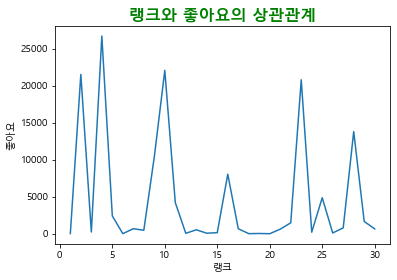

In [309]:
# 1ÏúÑÎ∂ÄÌÑ∞ 30ÏúÑ ÍπåÏßÄÏùò Îû≠ÌÅ¨ & Ï¢ãÏïÑÏöî ÏÇ¨Ïù¥Ïùò Í∑∏ÎûòÌîÑ

a = []
b = []
for i in range(30):
    a.append(top100_song_list['Rank'][i])
    b.append(top100_song_list['Like'][i])

plt.plot(a, b)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('Îû≠ÌÅ¨')
plt.ylabel('Ï¢ãÏïÑÏöî')
plt.title('Îû≠ÌÅ¨ÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

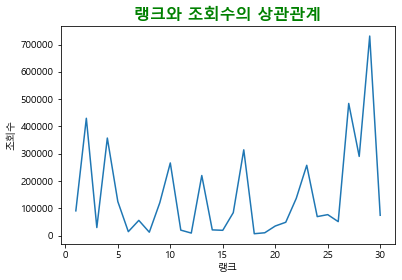

In [310]:
# 1ÏúÑÎ∂ÄÌÑ∞ 30ÏúÑ ÍπåÏßÄÏùò Îû≠ÌÅ¨ & Ï°∞ÌöåÏàò ÏÇ¨Ïù¥Ïùò Í∑∏ÎûòÌîÑ
a = []
b = []
for i in range(30):
    a.append(top100_song_list['Rank'][i])
    b.append(top100_song_list['Hit'][i])

plt.plot(a, b)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('Îû≠ÌÅ¨')
plt.ylabel('Ï°∞ÌöåÏàò')
plt.title('Îû≠ÌÅ¨ÏôÄ Ï°∞ÌöåÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

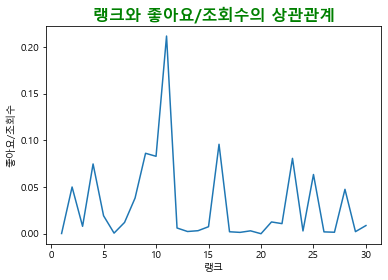

In [311]:
# 1ÏúÑÎ∂ÄÌÑ∞ 30ÏúÑ ÍπåÏßÄÏùò Îû≠ÌÅ¨ & Ï¢ãÏïÑÏöî/Ï°∞ÌöåÏàò ÏÇ¨Ïù¥Ïùò Í∑∏ÎûòÌîÑ
a = []
b = []
for i in range(30):
    a.append(top100_song_list['Rank'][i])
    b.append(top100_song_list['Like'][i]/top100_song_list['Hit'][i])
plt.plot(a, b)

title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('Îû≠ÌÅ¨')
plt.ylabel('Ï¢ãÏïÑÏöî/Ï°∞ÌöåÏàò')
plt.title('Îû≠ÌÅ¨ÏôÄ Ï¢ãÏïÑÏöî/Ï°∞ÌöåÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

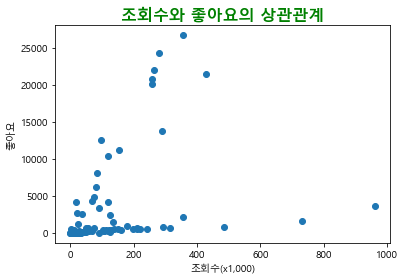

In [14]:
plt.scatter(top100_song_list['Hit']/1000, top100_song_list['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('Ï°∞ÌöåÏàò(x1,000)')
plt.ylabel('Ï¢ãÏïÑÏöî')
plt.title('Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

In [373]:
# ÏúÑÏùò ÏÇ∞Ï†êÎèÑ Í∑∏ÎûòÌîÑÍ∞Ä 2Î∞©Ìñ•ÏúºÎ°ú ÎÇòÎâòÍ∏∞ ÎïåÎ¨∏Ïóê ÌÅ¨Í≤å Î≤óÏñ¥ÎÇú Îç∞Ïù¥ÌÑ∞ Í∞ØÏàòÎ•º ÏÑ∏Ïñ¥ ÌëúÎ≥∏ÏúºÎ°ú ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º Îã§Ïãú Í∑∏Î¶º
like_sort = top100_song_list.sort_values(by='Like', ascending=False)
hit_sort = top100_song_list.sort_values(by='Hit', ascending=False)

In [374]:
like_sort_top5 = like_sort['Like'].head(5) # like Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú like ÏÉÅÏúÑ 5Í∞ú
like_sort_top5_hit = like_sort['Hit'].head(5) # like Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú hit ÏÉÅÏúÑ 5Í∞ú
hit_sort_top3 = hit_sort['Hit'].head(3) # hit Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú hit ÏÉÅÏúÑ 3Í∞ú
hit_sort_top3_like = hit_sort['Like'].head(3) # hit Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú like ÏÉÅÏúÑ 3Í∞ú

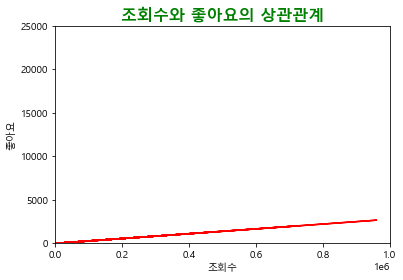

In [375]:
# hitÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 3Í∞ú Í∑∏ÎûòÌîÑ
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (hit_sort_top3_like.mean()/hit_sort_top3.mean()), 'r')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('Ï°∞ÌöåÏàò')
plt.ylabel('Ï¢ãÏïÑÏöî')
plt.title('Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

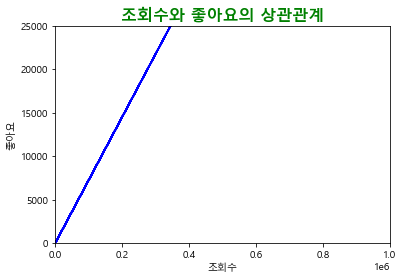

In [371]:
# likeÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 5Í∞ú Í∑∏ÎûòÌîÑ
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (like_sort_top5.mean()/like_sort_top5_hit.mean()), 'b')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('Ï°∞ÌöåÏàò')
plt.ylabel('Ï¢ãÏïÑÏöî')
plt.title('Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

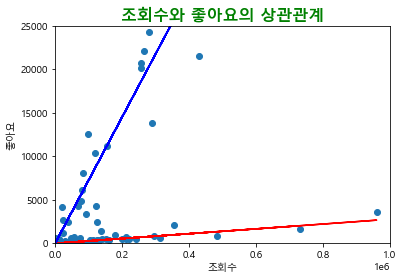

In [370]:
plt.scatter(top100_song_list['Hit'], top100_song_list['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (hit_sort_top5_like.mean()/hit_sort_top5.mean()), 'r')
plt.plot(top100_song_list['Hit'], top100_song_list['Hit'] * (like_sort_top5.mean()/like_sort_top5_hit.mean()), 'b')
plt.ylim(0, 25000)
plt.xlim(0, 1000000)
plt.xlabel('Ï°∞ÌöåÏàò')
plt.ylabel('Ï¢ãÏïÑÏöî')
plt.title('Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

In [167]:
x = (top100_song_list['Like']/top100_song_list['Hit']).sort_values(ascending=False)
x.head(6)
# top5 Îäî 0.09Ïù¥ÏÉÅÏúºÎ°ú Í≤∞Ï†ï

10    0.211735
70    0.194417
55    0.126742
78    0.115831
15    0.095834
58    0.086930
dtype: float64

In [168]:
y = (top100_song_list['Like']/top100_song_list['Hit']).sort_values()
y.head(9)
# bottom5Îäî 0.000305 Ïù¥ÌïòÎ°ú Í≤∞Ï†ï - ÏúÑÏùò 3ÏûêÎ£åÎäî Î∂ÑÏûêÍ∞íÏù¥ 0Ïù¥ÎØÄÎ°ú Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏

99    0.000000
80    0.000000
56    0.000000
19    0.000057
43    0.000119
93    0.000250
0     0.000276
61    0.000304
86    0.000341
dtype: float64

In [113]:
top5_list = []
for i in range(len(top100_song_list)):
    x = top100_song_list['Like'][i]/top100_song_list['Hit'][i]
    if  x > 0.09:
        top5_list.append(top100_song_list['Title'][i])

bottom5_list = []
for i in range(len(top100_song_list)):
    x = top100_song_list['Like'][i]/top100_song_list['Hit'][i]
    if   x < 0.000305:
        bottom5_list.append(top100_song_list['Title'][i])


In [114]:
top5_list

['ÎãπÏã†Ïù¥ ÍπÄÌò∏Ï§ëÏùÑ Ï≤òÏùå ÎßåÎÇúÎã§Î©¥? ÏÇ¨ÎûåÎì§ Î¶¨ÏñºÎ∞òÏùë Î™®Ïùå.zip',
 '‚ÄòÎÑå ÎÇòÏùò 20ÎåÄÏòÄÏñ¥‚Äô ‚ô¨ ÏòÅÌÉÅÏùò Îú®Í±∞Ïõ†Îçò 20ÎåÄ ÏãúÏ†à..',
 'ÍπÄÌò∏Ï§ëÏùò ÎßàÏßÄÎßâ Ïù∏ÏÇ¨   ÎßåÍ∞ú „Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5',
 '‚ô™ ÏÜåÏñëÍ∞ï Ï≤òÎÖÄ Í∞ÄÏù∏Ïù¥Ïñ¥Îùº~  - Í∞ïÏõêÎèÑ ÌûêÎßÅ ÌÉÄÏûÑ - [Ìä∏Î°Ø Ï†ÑÍµ≠Ï≤¥Ï†Ñ]',
 '‚ÄªÏµúÏ¥àÍ≥µÍ∞ú‚Äª ÍπÄÏ§ÄÏàò Ïã†Í≥° ‚ÄòPit a Pat‚Äô ‚ô¨ Ïò¨ÌïòÌä∏~‚ô•']

In [115]:
bottom5_list[3:]

['Ïã†ÎùºÏôïÏ°± Í≥†Î∂Ñ ÏúÑ Ï£ºÏ∞®Ìïú SUV Ïö¥Ï†ÑÏûê Ï∞æÏïòÎã§‚Ä¶Í≤ΩÏ£ºÏãú "Í≥†Î∞ú"',
 'ÌíÄÏòÅÏÉÅ ÎåÄÌïúÎØºÍµ≠ vs Ïπ¥ÌÉÄÎ•¥',
 "[ÎçîÎâ¥Ïä§-ÎçîÏù∏ÌÑ∞Î∑∞] Ìò∏ÌÖîÍπåÏßÄ Í≥µÍ≥µÎ¨ºÎüâ 'ÏòÅÎÅå'...Ï†ÑÏÑ∏ÎÇú Ìï¥Î≤ï Í∞ÄÎä•Ìï†Íπå?",
 'ÌïòÎ£® ÌôïÏßÑÏûê 300Î™ÖÏù∏Îç∞‚Ä¶ÎÖ∏ÎßàÏä§ÌÅ¨Î°ú MVP Í±∞Î∂Ä',
 '10Î™Ö Ïù¥ÏÉÅ Ïã†Í∑ú ÏßëÎã®Í∞êÏóº ÌïòÎ£® 10Í±¥...81ÏùºÎßåÏóê 3Î∞± Î™ÖÎåÄ']

#### Í≤∞Í≥º : Ï¢ãÏïÑÏöîÎÇò Ï°∞ÌöåÏàòÍ∞Ä ÌòÑÏû¨ Îû≠ÌÅ¨Î•º Í≤∞Ï†ïÌïòÎäî Í∏∞Ï§ÄÏóê ÏòÅÌñ•ÏùÑ Ï§ÄÎã§Îäî Í≤ÉÏùÄ Ïïå Ïàò ÏóÜÏßÄÎßå, ÏÇ∞Ï†êÎèÑ Í∑∏ÎûòÌîÑÏóêÏÑú Í∏∞Ïö∏Í∏∞Í∞Ä ÌÅ¥ÏàòÎ°ù(Ï°∞ÌöåÏàò Î≥Ñ Ï¢ãÏïÑÏöîÍ∞Ä ÎßéÏùÑ Í≤ΩÏö∞) Í∞ÄÏöîÌîÑÎ°úÍ∑∏Îû®Ïù¥ ÎßéÏïòÍ≥†, Í∏∞Ïö∏Í∏∞Í∞Ä ÎÇÆÏùÑÏàòÎ°ù(Ï°∞ÌöåÏàò Î≥Ñ Ï¢ãÏïÑÏöîÍ∞Ä Ï†ÅÏùÑ Í≤ΩÏö∞) Îâ¥Ïä§Ï™Ω ÏòÅÏÉÅÏù¥ ÎßéÏïòÎã§.

### 11Ïõî 18ÏùºÍ≥º 11Ïõî 19Ïùº Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê
#### ÎπÑÍµê Í∏∞Ï§Ä : 11.18 Ïò§ÌõÑ 4Ïãú ~ Ïò§ÌõÑ 5Ïãú & 11.19 Ïò§ÌõÑ 3Ïãú ~ Ïò§ÌõÑ 4Ïãú

In [4]:
top100_song_list = pd.read_csv('top100_song_list.csv') # 11.18Ïùº 4 ~ 5Ïãú ÏÇ¨Ïù¥ Îç∞Ïù¥ÌÑ∞

In [3]:
top100_song_list1 = pd.read_csv('top100_song_list1.csv') # 11.19Ïùº 3 ~ 4Ïãú ÏÇ¨Ïù¥ Îç∞Ïù¥ÌÑ∞

In [5]:
title = []
hit = []
like = []
rank = []
for i in range(len(top100_song_list)):
    for k in range(len(top100_song_list1)):
        x = top100_song_list
        y = top100_song_list1
        if x['Title'][i] == y['Title'][k]:
            a = y['Like'][k] - x['Like'][i]
            b = y['Hit'][k] - x['Hit'][i]
            c = y['Rank'][k] - x['Rank'][i]
            title.append(x['Title'][i])
            hit.append(a)
            like.append(b)
            rank.append(c)

In [6]:
comp = pd.DataFrame({
    'Title': title,
    'Hit': hit,
    'Like': like,
    'Rank': rank
})
comp

Title   Hit   Like  Rank
0           Ïû†ÏãúÎßå ÏïàÎÖï. ÍπÄÌò∏Ï§ë Íµ∞Î≥µÎ¨¥Ï†Ñ ÎßàÏßÄÎßâ Î¨¥ÎåÄ ÔºúÎ∞∞ÏõÖÔºû„Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5   138  12976     1
1                              Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´   373  15117    -2
2                       ÏÜåÎ¶ÑÏù¥ Ï´ò-ÏïÖ‚Üó Ïù¥Ï∞¨Ïõê‚úïÏò•ÏßÑÏö± ‚ÄòÎÇ®ÏûêÎùºÎäî Ïù¥Ïú†Î°ú‚Äô ‚ô™   117   8178    -1
3                            ÏûÑÏòÅÏõÖ ‚ÄòÏò§ÎûúÎßåÏù¥Ïïº‚Äô ‚ô™ Í∞ÄÏä¥ Ï∞°-Ìïú Î¨¥ÎåÄüò•   226   4575     1
4                   ÎãπÏã†Ïù¥ ÍπÄÌò∏Ï§ëÏùÑ Ï≤òÏùå ÎßåÎÇúÎã§Î©¥? ÏÇ¨ÎûåÎì§ Î¶¨ÏñºÎ∞òÏùë Î™®Ïùå.zip  1025   6208     3
5   SK ÏïºÏàòFA Î≥¥Í∞ï Ï†àÏã§ / LG ÏúåÏä® ÍµêÏ≤¥ Í∞ÄÎä•ÏÑ± / Î°ØÎç∞ ÏÑ±ÎØºÍ∑ú-ÌóàÎ¨∏Ìöå ÎÇ¥ÎÖÑÏóêÎèÑ Ìï®Íªò    51  11503    79
6                                      HL ÎåÄÌïúÎØºÍµ≠ vs Ïπ¥ÌÉÄÎ•¥    64  23263    48
7               [Îß§Î∂ÄÎ¶¨TV] ÎÇ¥ÎÖÑ ÏßëÍ∞íÏù¥ ÏúÑÌóòÌïú Ïù¥Ïú†/ Ïù¥Í¥ëÏàò ÎØ∏ÎûòÏóêÏÖãÏ¶ùÍ∂å Ïó∞Íµ¨Ïõê    51  20399    78
8                    ‚ÄòÎÑå ÎÇòÏùò 20ÎåÄÏòÄÏñ¥‚Äô ‚ô¨ ÏòÅÌÉÅÏùò Îú®Í±∞Ïõ†Îçò 20ÎåÄ ÏãúÏ†à..   137   5398    -6
9              [Ï†ÑÏ≤¥HL] 'ÎÇòÏÑ±Î≤î 4ÏïàÌÉÄ+ÏïåÌÖåÏñ¥ ÌôàÎü∞' NC, ÎëêÏÇ∞ Ïû°Í≥† Í∏∞ÏÑ†Ï†úÏïï    44  11122    37
10                           ‚ÄúÏ†úÏùº Ï§ëÏöîÌïú Í±¥ ÎÑàÏïº‚Äù ÏäµÍ¥Ä Î∞îÍæ∏ÎùºÎäî ÏóÑÎßà    66  23355    59
11                        Í∏∞ÎåÄÌïòÏÑ∏Ïöî~ ÏÜåÎ¶Ñ ÎèãÎäî 14ÏÇ¥Ïùò Ï†àÏ†àÌï® ‚ÄòÏÇ¨Î™®‚Äô‚ô™   121   6030    -7
12                      ÏÜåÏõê Î∂àÎßåÍ∞ÄÎìù‚ô® 20ÎßåÏõê ÍΩÉÎã§Î∞úÏóê Í∏â Í≥ºÍ±∞ ÌöåÏÉÅ..üò©    47  28498     7
13                      [8Ìöå ÏòàÍ≥†] Ïú†ÏßÑ, Ìó§ÎùºÌå∞Î¶¨Ïä§ ÏûÖÏÑ±Ìï† Ïàò ÏûàÏùÑÍπå?!    88  47508    68
14                       [ÌíÄÎ≤ÑÏ†Ñ] ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ Ïù¥Ï∞¨Ïõê 'Îñ†ÎÇòÎäî ÏûÑÏïÑ' ‚ô´    65   2029    -5
15              ‚ÄúÎÇ¥ ÏûêÏãùÏù¥Í∏∞ÎèÑ Ìï¥Ïöî‚Äù Ïù¥ÏßÄÏïÑ, ÏåçÎë•Ïù¥ ÏïïÎ∞ïÌïòÎäî ÏóÑÍ∏∞Ï§ÄÏóê Îì† Î∞òÍ∏∞!    63  17570    57
16                          ÏÜåÏõêÏùò ÎπÖÌîºÏ≤ò? ‚ÄúÎàÑÍ∞Ä ÌòúÏ†ïÏù¥ Ïò∑ ÏÇ¨Ï£ºÎãàÍπå~‚Äù    23  18995    17
17                  ‚ÄòI Believe‚Äô ‚ô´ Ìù¨Ïû¨Í∞Ä 100Ï†ê Î∞õÏùÑ Í±∞Îùº ÎØøÏñ¥Ïöîüòò    57   3961    -8
18                    ÌÖêÏÖò Ïò¨Î†§ÏÑú Í∞ëÏãúÎã§! 93ÎÖÑÏúºÎ°ú~ ‚ÄòÏ≤òÏùå Í∑∏ ÎäêÎÇåÏ≤òÎüº‚Äô‚ô™   114   2798    -5
19                       ÎßàÏùå ÎèÑÎÇú Ï£ºÏùòÎ≥¥ Î∞úÎ†π~ ÌïòÎäòÏóêÏÑú ÏòÅÌÉÅÏù¥ ÎÇ¥Î†§ÏôÄ‚ô¨‚ô°   121   3934    -8
20                                          ÎëêÏÇ∞-NC ÌíÄÏòÅÏÉÅ    16   7177   -25
21                           ÎÇòÏôîÎã§! Ï∞¨ÏõêÏù¥Ïùò ÌïÑÏÇ¥Í∏∞‚Üó ‚ÄòÎØ∏Ïö¥ ÏÇ¨ÎÇ¥‚Äô ‚ô¨    21   1601    -6
22                Î∞ïÏÑúÏßÑ ‚ÄòÎ∞ÄÏñ¥ Î∞ÄÏñ¥ (PUSH PUSH)‚Äô - KMDF 2020    91   4357    17
23                      MV„Ö£ÎÇòÌõàÏïÑ  - ÌÖåÏä§Ìòï!„Ö£2020 Ïã†Í≥° ÏïÑÌôâ Ïù¥ÏïºÍ∏∞    26  10207     7
24                      ‚ÄòBeautiful‚Äô‚ô™ Ï†ÑÏ£ºÎ∂ÄÌÑ∞ Ï∞®Ïò§Î•¥Îäî Í∞êÏÑ± ÏòÅÏõÖ‚ô•   131   6480    11
25                   ÍπÄÌù¨Ïû¨‚úïÏù¥ÏàòÏòÅ ‚ÄòÏä¨Ìîà ÏÇ¨ÎûëÏùò ÎÖ∏Îûò‚Äô ‚ô´  Í∞êÎØ∏Î°úÏö¥ ÎìÄÏó£..    61   3065   -14
26                       ‚ÄòÍ≥†Î∞±‚Äô ‚ô¨ ÌÅ¨Îü¨Ïâ¨ ‚úï MCÏõÖÏùò Ïà®Í≤®ÏôîÎçò Îû© Ïã§Î†•üé§   155  10730     0

In [7]:
comp.sort_values(by='Like', ascending=False)

Title   Hit   Like  Rank
13                      [8Ìöå ÏòàÍ≥†] Ïú†ÏßÑ, Ìó§ÎùºÌå∞Î¶¨Ïä§ ÏûÖÏÑ±Ìï† Ïàò ÏûàÏùÑÍπå?!    88  47508    68
12                      ÏÜåÏõê Î∂àÎßåÍ∞ÄÎìù‚ô® 20ÎßåÏõê ÍΩÉÎã§Î∞úÏóê Í∏â Í≥ºÍ±∞ ÌöåÏÉÅ..üò©    47  28498     7
10                           ‚ÄúÏ†úÏùº Ï§ëÏöîÌïú Í±¥ ÎÑàÏïº‚Äù ÏäµÍ¥Ä Î∞îÍæ∏ÎùºÎäî ÏóÑÎßà    66  23355    59
6                                      HL ÎåÄÌïúÎØºÍµ≠ vs Ïπ¥ÌÉÄÎ•¥    64  23263    48
7               [Îß§Î∂ÄÎ¶¨TV] ÎÇ¥ÎÖÑ ÏßëÍ∞íÏù¥ ÏúÑÌóòÌïú Ïù¥Ïú†/ Ïù¥Í¥ëÏàò ÎØ∏ÎûòÏóêÏÖãÏ¶ùÍ∂å Ïó∞Íµ¨Ïõê    51  20399    78
16                          ÏÜåÏõêÏùò ÎπÖÌîºÏ≤ò? ‚ÄúÎàÑÍ∞Ä ÌòúÏ†ïÏù¥ Ïò∑ ÏÇ¨Ï£ºÎãàÍπå~‚Äù    23  18995    17
15              ‚ÄúÎÇ¥ ÏûêÏãùÏù¥Í∏∞ÎèÑ Ìï¥Ïöî‚Äù Ïù¥ÏßÄÏïÑ, ÏåçÎë•Ïù¥ ÏïïÎ∞ïÌïòÎäî ÏóÑÍ∏∞Ï§ÄÏóê Îì† Î∞òÍ∏∞!    63  17570    57
1                              Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´   373  15117    -2
0           Ïû†ÏãúÎßå ÏïàÎÖï. ÍπÄÌò∏Ï§ë Íµ∞Î≥µÎ¨¥Ï†Ñ ÎßàÏßÄÎßâ Î¨¥ÎåÄ ÔºúÎ∞∞ÏõÖÔºû„Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5   138  12976     1
5   SK ÏïºÏàòFA Î≥¥Í∞ï Ï†àÏã§ / LG ÏúåÏä® ÍµêÏ≤¥ Í∞ÄÎä•ÏÑ± / Î°ØÎç∞ ÏÑ±ÎØºÍ∑ú-ÌóàÎ¨∏Ìöå ÎÇ¥ÎÖÑÏóêÎèÑ Ìï®Íªò    51  11503    79
9              [Ï†ÑÏ≤¥HL] 'ÎÇòÏÑ±Î≤î 4ÏïàÌÉÄ+ÏïåÌÖåÏñ¥ ÌôàÎü∞' NC, ÎëêÏÇ∞ Ïû°Í≥† Í∏∞ÏÑ†Ï†úÏïï    44  11122    37
26                       ‚ÄòÍ≥†Î∞±‚Äô ‚ô¨ ÌÅ¨Îü¨Ïâ¨ ‚úï MCÏõÖÏùò Ïà®Í≤®ÏôîÎçò Îû© Ïã§Î†•üé§   155  10730     0
23                      MV„Ö£ÎÇòÌõàÏïÑ  - ÌÖåÏä§Ìòï!„Ö£2020 Ïã†Í≥° ÏïÑÌôâ Ïù¥ÏïºÍ∏∞    26  10207     7
2                       ÏÜåÎ¶ÑÏù¥ Ï´ò-ÏïÖ‚Üó Ïù¥Ï∞¨Ïõê‚úïÏò•ÏßÑÏö± ‚ÄòÎÇ®ÏûêÎùºÎäî Ïù¥Ïú†Î°ú‚Äô ‚ô™   117   8178    -1
20                                          ÎëêÏÇ∞-NC ÌíÄÏòÅÏÉÅ    16   7177   -25
24                      ‚ÄòBeautiful‚Äô‚ô™ Ï†ÑÏ£ºÎ∂ÄÌÑ∞ Ï∞®Ïò§Î•¥Îäî Í∞êÏÑ± ÏòÅÏõÖ‚ô•   131   6480    11
4                   ÎãπÏã†Ïù¥ ÍπÄÌò∏Ï§ëÏùÑ Ï≤òÏùå ÎßåÎÇúÎã§Î©¥? ÏÇ¨ÎûåÎì§ Î¶¨ÏñºÎ∞òÏùë Î™®Ïùå.zip  1025   6208     3
11                        Í∏∞ÎåÄÌïòÏÑ∏Ïöî~ ÏÜåÎ¶Ñ ÎèãÎäî 14ÏÇ¥Ïùò Ï†àÏ†àÌï® ‚ÄòÏÇ¨Î™®‚Äô‚ô™   121   6030    -7
8                    ‚ÄòÎÑå ÎÇòÏùò 20ÎåÄÏòÄÏñ¥‚Äô ‚ô¨ ÏòÅÌÉÅÏùò Îú®Í±∞Ïõ†Îçò 20ÎåÄ ÏãúÏ†à..   137   5398    -6
3                            ÏûÑÏòÅÏõÖ ‚ÄòÏò§ÎûúÎßåÏù¥Ïïº‚Äô ‚ô™ Í∞ÄÏä¥ Ï∞°-Ìïú Î¨¥ÎåÄüò•   226   4575     1
22                Î∞ïÏÑúÏßÑ ‚ÄòÎ∞ÄÏñ¥ Î∞ÄÏñ¥ (PUSH PUSH)‚Äô - KMDF 2020    91   4357    17
17                  ‚ÄòI Believe‚Äô ‚ô´ Ìù¨Ïû¨Í∞Ä 100Ï†ê Î∞õÏùÑ Í±∞Îùº ÎØøÏñ¥Ïöîüòò    57   3961    -8
19                       ÎßàÏùå ÎèÑÎÇú Ï£ºÏùòÎ≥¥ Î∞úÎ†π~ ÌïòÎäòÏóêÏÑú ÏòÅÌÉÅÏù¥ ÎÇ¥Î†§ÏôÄ‚ô¨‚ô°   121   3934    -8
25                   ÍπÄÌù¨Ïû¨‚úïÏù¥ÏàòÏòÅ ‚ÄòÏä¨Ìîà ÏÇ¨ÎûëÏùò ÎÖ∏Îûò‚Äô ‚ô´  Í∞êÎØ∏Î°úÏö¥ ÎìÄÏó£..    61   3065   -14
18                    ÌÖêÏÖò Ïò¨Î†§ÏÑú Í∞ëÏãúÎã§! 93ÎÖÑÏúºÎ°ú~ ‚ÄòÏ≤òÏùå Í∑∏ ÎäêÎÇåÏ≤òÎüº‚Äô‚ô™   114   2798    -5
14                       [ÌíÄÎ≤ÑÏ†Ñ] ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ Ïù¥Ï∞¨Ïõê 'Îñ†ÎÇòÎäî ÏûÑÏïÑ' ‚ô´    65   2029    -5
21                           ÎÇòÏôîÎã§! Ï∞¨ÏõêÏù¥Ïùò ÌïÑÏÇ¥Í∏∞‚Üó ‚ÄòÎØ∏Ïö¥ ÏÇ¨ÎÇ¥‚Äô ‚ô¨    21   1601    -6

In [8]:
comp.sort_values(by='Rank')

Title   Hit   Like  Rank
20                                          ÎëêÏÇ∞-NC ÌíÄÏòÅÏÉÅ    16   7177   -25
25                   ÍπÄÌù¨Ïû¨‚úïÏù¥ÏàòÏòÅ ‚ÄòÏä¨Ìîà ÏÇ¨ÎûëÏùò ÎÖ∏Îûò‚Äô ‚ô´  Í∞êÎØ∏Î°úÏö¥ ÎìÄÏó£..    61   3065   -14
19                       ÎßàÏùå ÎèÑÎÇú Ï£ºÏùòÎ≥¥ Î∞úÎ†π~ ÌïòÎäòÏóêÏÑú ÏòÅÌÉÅÏù¥ ÎÇ¥Î†§ÏôÄ‚ô¨‚ô°   121   3934    -8
17                  ‚ÄòI Believe‚Äô ‚ô´ Ìù¨Ïû¨Í∞Ä 100Ï†ê Î∞õÏùÑ Í±∞Îùº ÎØøÏñ¥Ïöîüòò    57   3961    -8
11                        Í∏∞ÎåÄÌïòÏÑ∏Ïöî~ ÏÜåÎ¶Ñ ÎèãÎäî 14ÏÇ¥Ïùò Ï†àÏ†àÌï® ‚ÄòÏÇ¨Î™®‚Äô‚ô™   121   6030    -7
21                           ÎÇòÏôîÎã§! Ï∞¨ÏõêÏù¥Ïùò ÌïÑÏÇ¥Í∏∞‚Üó ‚ÄòÎØ∏Ïö¥ ÏÇ¨ÎÇ¥‚Äô ‚ô¨    21   1601    -6
8                    ‚ÄòÎÑå ÎÇòÏùò 20ÎåÄÏòÄÏñ¥‚Äô ‚ô¨ ÏòÅÌÉÅÏùò Îú®Í±∞Ïõ†Îçò 20ÎåÄ ÏãúÏ†à..   137   5398    -6
18                    ÌÖêÏÖò Ïò¨Î†§ÏÑú Í∞ëÏãúÎã§! 93ÎÖÑÏúºÎ°ú~ ‚ÄòÏ≤òÏùå Í∑∏ ÎäêÎÇåÏ≤òÎüº‚Äô‚ô™   114   2798    -5
14                       [ÌíÄÎ≤ÑÏ†Ñ] ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ Ïù¥Ï∞¨Ïõê 'Îñ†ÎÇòÎäî ÏûÑÏïÑ' ‚ô´    65   2029    -5
1                              Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´   373  15117    -2
2                       ÏÜåÎ¶ÑÏù¥ Ï´ò-ÏïÖ‚Üó Ïù¥Ï∞¨Ïõê‚úïÏò•ÏßÑÏö± ‚ÄòÎÇ®ÏûêÎùºÎäî Ïù¥Ïú†Î°ú‚Äô ‚ô™   117   8178    -1
26                       ‚ÄòÍ≥†Î∞±‚Äô ‚ô¨ ÌÅ¨Îü¨Ïâ¨ ‚úï MCÏõÖÏùò Ïà®Í≤®ÏôîÎçò Îû© Ïã§Î†•üé§   155  10730     0
0           Ïû†ÏãúÎßå ÏïàÎÖï. ÍπÄÌò∏Ï§ë Íµ∞Î≥µÎ¨¥Ï†Ñ ÎßàÏßÄÎßâ Î¨¥ÎåÄ ÔºúÎ∞∞ÏõÖÔºû„Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5   138  12976     1
3                            ÏûÑÏòÅÏõÖ ‚ÄòÏò§ÎûúÎßåÏù¥Ïïº‚Äô ‚ô™ Í∞ÄÏä¥ Ï∞°-Ìïú Î¨¥ÎåÄüò•   226   4575     1
4                   ÎãπÏã†Ïù¥ ÍπÄÌò∏Ï§ëÏùÑ Ï≤òÏùå ÎßåÎÇúÎã§Î©¥? ÏÇ¨ÎûåÎì§ Î¶¨ÏñºÎ∞òÏùë Î™®Ïùå.zip  1025   6208     3
23                      MV„Ö£ÎÇòÌõàÏïÑ  - ÌÖåÏä§Ìòï!„Ö£2020 Ïã†Í≥° ÏïÑÌôâ Ïù¥ÏïºÍ∏∞    26  10207     7
12                      ÏÜåÏõê Î∂àÎßåÍ∞ÄÎìù‚ô® 20ÎßåÏõê ÍΩÉÎã§Î∞úÏóê Í∏â Í≥ºÍ±∞ ÌöåÏÉÅ..üò©    47  28498     7
24                      ‚ÄòBeautiful‚Äô‚ô™ Ï†ÑÏ£ºÎ∂ÄÌÑ∞ Ï∞®Ïò§Î•¥Îäî Í∞êÏÑ± ÏòÅÏõÖ‚ô•   131   6480    11
16                          ÏÜåÏõêÏùò ÎπÖÌîºÏ≤ò? ‚ÄúÎàÑÍ∞Ä ÌòúÏ†ïÏù¥ Ïò∑ ÏÇ¨Ï£ºÎãàÍπå~‚Äù    23  18995    17
22                Î∞ïÏÑúÏßÑ ‚ÄòÎ∞ÄÏñ¥ Î∞ÄÏñ¥ (PUSH PUSH)‚Äô - KMDF 2020    91   4357    17
9              [Ï†ÑÏ≤¥HL] 'ÎÇòÏÑ±Î≤î 4ÏïàÌÉÄ+ÏïåÌÖåÏñ¥ ÌôàÎü∞' NC, ÎëêÏÇ∞ Ïû°Í≥† Í∏∞ÏÑ†Ï†úÏïï    44  11122    37
6                                      HL ÎåÄÌïúÎØºÍµ≠ vs Ïπ¥ÌÉÄÎ•¥    64  23263    48
15              ‚ÄúÎÇ¥ ÏûêÏãùÏù¥Í∏∞ÎèÑ Ìï¥Ïöî‚Äù Ïù¥ÏßÄÏïÑ, ÏåçÎë•Ïù¥ ÏïïÎ∞ïÌïòÎäî ÏóÑÍ∏∞Ï§ÄÏóê Îì† Î∞òÍ∏∞!    63  17570    57
10                           ‚ÄúÏ†úÏùº Ï§ëÏöîÌïú Í±¥ ÎÑàÏïº‚Äù ÏäµÍ¥Ä Î∞îÍæ∏ÎùºÎäî ÏóÑÎßà    66  23355    59
13                      [8Ìöå ÏòàÍ≥†] Ïú†ÏßÑ, Ìó§ÎùºÌå∞Î¶¨Ïä§ ÏûÖÏÑ±Ìï† Ïàò ÏûàÏùÑÍπå?!    88  47508    68
7               [Îß§Î∂ÄÎ¶¨TV] ÎÇ¥ÎÖÑ ÏßëÍ∞íÏù¥ ÏúÑÌóòÌïú Ïù¥Ïú†/ Ïù¥Í¥ëÏàò ÎØ∏ÎûòÏóêÏÖãÏ¶ùÍ∂å Ïó∞Íµ¨Ïõê    51  20399    78
5   SK ÏïºÏàòFA Î≥¥Í∞ï Ï†àÏã§ / LG ÏúåÏä® ÍµêÏ≤¥ Í∞ÄÎä•ÏÑ± / Î°ØÎç∞ ÏÑ±ÎØºÍ∑ú-ÌóàÎ¨∏Ìöå ÎÇ¥ÎÖÑÏóêÎèÑ Ìï®Íªò    51  11503    79

In [9]:
comp.sort_values(by='Hit', ascending=False)

Title   Hit   Like  Rank
4                   ÎãπÏã†Ïù¥ ÍπÄÌò∏Ï§ëÏùÑ Ï≤òÏùå ÎßåÎÇúÎã§Î©¥? ÏÇ¨ÎûåÎì§ Î¶¨ÏñºÎ∞òÏùë Î™®Ïùå.zip  1025   6208     3
1                              Î†àÏ†ÑÎìú Î¨¥ÎåÄ ÏòàÏïΩüòç ÏûÑÏòÅÏõÖ ‚ÄòÍ∑∏ÎÇ†Îì§‚Äô ‚ô´   373  15117    -2
3                            ÏûÑÏòÅÏõÖ ‚ÄòÏò§ÎûúÎßåÏù¥Ïïº‚Äô ‚ô™ Í∞ÄÏä¥ Ï∞°-Ìïú Î¨¥ÎåÄüò•   226   4575     1
26                       ‚ÄòÍ≥†Î∞±‚Äô ‚ô¨ ÌÅ¨Îü¨Ïâ¨ ‚úï MCÏõÖÏùò Ïà®Í≤®ÏôîÎçò Îû© Ïã§Î†•üé§   155  10730     0
0           Ïû†ÏãúÎßå ÏïàÎÖï. ÍπÄÌò∏Ï§ë Íµ∞Î≥µÎ¨¥Ï†Ñ ÎßàÏßÄÎßâ Î¨¥ÎåÄ ÔºúÎ∞∞ÏõÖÔºû„Ö£ÍπÄÌò∏Ï§ëÏùòÌååÌä∏ÎÑà EP.5   138  12976     1
8                    ‚ÄòÎÑå ÎÇòÏùò 20ÎåÄÏòÄÏñ¥‚Äô ‚ô¨ ÏòÅÌÉÅÏùò Îú®Í±∞Ïõ†Îçò 20ÎåÄ ÏãúÏ†à..   137   5398    -6
24                      ‚ÄòBeautiful‚Äô‚ô™ Ï†ÑÏ£ºÎ∂ÄÌÑ∞ Ï∞®Ïò§Î•¥Îäî Í∞êÏÑ± ÏòÅÏõÖ‚ô•   131   6480    11
19                       ÎßàÏùå ÎèÑÎÇú Ï£ºÏùòÎ≥¥ Î∞úÎ†π~ ÌïòÎäòÏóêÏÑú ÏòÅÌÉÅÏù¥ ÎÇ¥Î†§ÏôÄ‚ô¨‚ô°   121   3934    -8
11                        Í∏∞ÎåÄÌïòÏÑ∏Ïöî~ ÏÜåÎ¶Ñ ÎèãÎäî 14ÏÇ¥Ïùò Ï†àÏ†àÌï® ‚ÄòÏÇ¨Î™®‚Äô‚ô™   121   6030    -7
2                       ÏÜåÎ¶ÑÏù¥ Ï´ò-ÏïÖ‚Üó Ïù¥Ï∞¨Ïõê‚úïÏò•ÏßÑÏö± ‚ÄòÎÇ®ÏûêÎùºÎäî Ïù¥Ïú†Î°ú‚Äô ‚ô™   117   8178    -1
18                    ÌÖêÏÖò Ïò¨Î†§ÏÑú Í∞ëÏãúÎã§! 93ÎÖÑÏúºÎ°ú~ ‚ÄòÏ≤òÏùå Í∑∏ ÎäêÎÇåÏ≤òÎüº‚Äô‚ô™   114   2798    -5
22                Î∞ïÏÑúÏßÑ ‚ÄòÎ∞ÄÏñ¥ Î∞ÄÏñ¥ (PUSH PUSH)‚Äô - KMDF 2020    91   4357    17
13                      [8Ìöå ÏòàÍ≥†] Ïú†ÏßÑ, Ìó§ÎùºÌå∞Î¶¨Ïä§ ÏûÖÏÑ±Ìï† Ïàò ÏûàÏùÑÍπå?!    88  47508    68
10                           ‚ÄúÏ†úÏùº Ï§ëÏöîÌïú Í±¥ ÎÑàÏïº‚Äù ÏäµÍ¥Ä Î∞îÍæ∏ÎùºÎäî ÏóÑÎßà    66  23355    59
14                       [ÌíÄÎ≤ÑÏ†Ñ] ÏÇ¨ÎûëÏùò ÏΩúÏÑºÌÉÄ Ïù¥Ï∞¨Ïõê 'Îñ†ÎÇòÎäî ÏûÑÏïÑ' ‚ô´    65   2029    -5
6                                      HL ÎåÄÌïúÎØºÍµ≠ vs Ïπ¥ÌÉÄÎ•¥    64  23263    48
15              ‚ÄúÎÇ¥ ÏûêÏãùÏù¥Í∏∞ÎèÑ Ìï¥Ïöî‚Äù Ïù¥ÏßÄÏïÑ, ÏåçÎë•Ïù¥ ÏïïÎ∞ïÌïòÎäî ÏóÑÍ∏∞Ï§ÄÏóê Îì† Î∞òÍ∏∞!    63  17570    57
25                   ÍπÄÌù¨Ïû¨‚úïÏù¥ÏàòÏòÅ ‚ÄòÏä¨Ìîà ÏÇ¨ÎûëÏùò ÎÖ∏Îûò‚Äô ‚ô´  Í∞êÎØ∏Î°úÏö¥ ÎìÄÏó£..    61   3065   -14
17                  ‚ÄòI Believe‚Äô ‚ô´ Ìù¨Ïû¨Í∞Ä 100Ï†ê Î∞õÏùÑ Í±∞Îùº ÎØøÏñ¥Ïöîüòò    57   3961    -8
5   SK ÏïºÏàòFA Î≥¥Í∞ï Ï†àÏã§ / LG ÏúåÏä® ÍµêÏ≤¥ Í∞ÄÎä•ÏÑ± / Î°ØÎç∞ ÏÑ±ÎØºÍ∑ú-ÌóàÎ¨∏Ìöå ÎÇ¥ÎÖÑÏóêÎèÑ Ìï®Íªò    51  11503    79
7               [Îß§Î∂ÄÎ¶¨TV] ÎÇ¥ÎÖÑ ÏßëÍ∞íÏù¥ ÏúÑÌóòÌïú Ïù¥Ïú†/ Ïù¥Í¥ëÏàò ÎØ∏ÎûòÏóêÏÖãÏ¶ùÍ∂å Ïó∞Íµ¨Ïõê    51  20399    78
12                      ÏÜåÏõê Î∂àÎßåÍ∞ÄÎìù‚ô® 20ÎßåÏõê ÍΩÉÎã§Î∞úÏóê Í∏â Í≥ºÍ±∞ ÌöåÏÉÅ..üò©    47  28498     7
9              [Ï†ÑÏ≤¥HL] 'ÎÇòÏÑ±Î≤î 4ÏïàÌÉÄ+ÏïåÌÖåÏñ¥ ÌôàÎü∞' NC, ÎëêÏÇ∞ Ïû°Í≥† Í∏∞ÏÑ†Ï†úÏïï    44  11122    37
23                      MV„Ö£ÎÇòÌõàÏïÑ  - ÌÖåÏä§Ìòï!„Ö£2020 Ïã†Í≥° ÏïÑÌôâ Ïù¥ÏïºÍ∏∞    26  10207     7
16                          ÏÜåÏõêÏùò ÎπÖÌîºÏ≤ò? ‚ÄúÎàÑÍ∞Ä ÌòúÏ†ïÏù¥ Ïò∑ ÏÇ¨Ï£ºÎãàÍπå~‚Äù    23  18995    17
21                           ÎÇòÏôîÎã§! Ï∞¨ÏõêÏù¥Ïùò ÌïÑÏÇ¥Í∏∞‚Üó ‚ÄòÎØ∏Ïö¥ ÏÇ¨ÎÇ¥‚Äô ‚ô¨    21   1601    -6
20                                          ÎëêÏÇ∞-NC ÌíÄÏòÅÏÉÅ    16   7177   -25

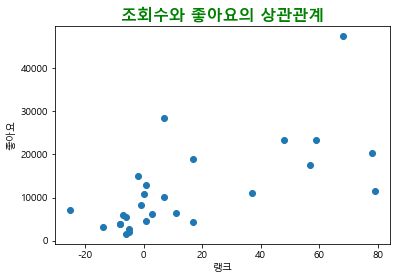

In [10]:
plt.scatter(comp['Rank'], comp['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('Îû≠ÌÅ¨')
plt.ylabel('Ï¢ãÏïÑÏöî')
plt.title('Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

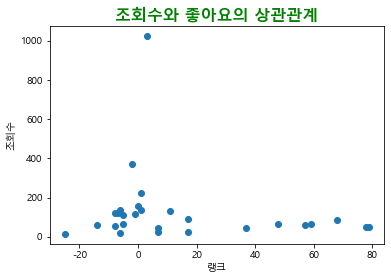

In [11]:
plt.scatter(comp['Rank'], comp['Hit'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('Îû≠ÌÅ¨')
plt.ylabel('Ï°∞ÌöåÏàò')
plt.title('Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()

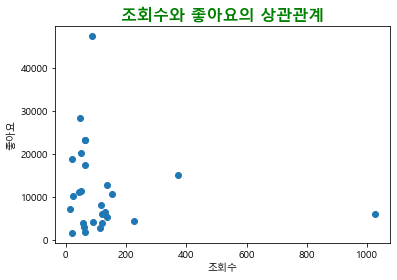

In [12]:
plt.scatter(comp['Hit'], comp['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('Ï°∞ÌöåÏàò')
plt.ylabel('Ï¢ãÏïÑÏöî')
plt.title('Ï°∞ÌöåÏàòÏôÄ Ï¢ãÏïÑÏöîÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontdict=title_font)
plt.show()